# Simple Litecoin Profitablity analysis

The data is taken from my little litecoin farm, just try to simply analyze how profit the mining is.

In [250]:
%load_ext lab_black
# auto format code with Black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [251]:
df = pd.read_csv("rewards.csv")  # my data downloaded from my pool

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
Last Share Time (UTC)    61 non-null object
Difficulty               61 non-null float64
PPS Ratio                61 non-null object
Donation                 61 non-null object
PPS Rate                 61 non-null float64
Shares                   61 non-null int64
Rewards                  61 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.4+ KB


Turn the Date column to a datetime format

In [253]:
df["last_time"] = pd.to_datetime(df["Last Share Time (UTC)"])

Set it as the index

In [254]:
df.set_index(df.last_time, inplace=True)

In [255]:
df.head()

,Last Share Time (UTC),Difficulty,PPS Ratio,Donation,PPS Rate,Shares,Rewards,last_time
last_time,,,,,,,,
2018-05-24 13:15:00,2018-05-24 13:15,1.065980e+07,101.0%,0.0%,3.614370e-11,1094716928,0.039567,2018-05-24 13:15:00
2018-05-28 04:35:00,2018-05-28 04:35,1.130795e+07,101.0%,0.0%,3.407200e-11,820195840,0.027946,2018-05-28 04:35:00
2018-05-31 20:17:00,2018-05-31 20:17,1.092329e+07,101.0%,0.0%,3.527180e-11,2845824768,0.100377,2018-05-31 20:17:00
2018-06-04 10:59:00,2018-06-04 10:59,1.045068e+07,101.0%,0.0%,3.686690e-11,2795880448,0.103075,2018-06-04 10:59:00
2018-06-07 16:36:00,2018-06-07 16:36,1.012035e+07,101.0%,0.0%,3.807030e-11,4643028992,0.176762,2018-06-07 16:36:00


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2018-05-24 13:15:00 to 2018-12-06 16:04:00
Data columns (total 8 columns):
Last Share Time (UTC)    61 non-null object
Difficulty               61 non-null float64
PPS Ratio                61 non-null object
Donation                 61 non-null object
PPS Rate                 61 non-null float64
Shares                   61 non-null int64
Rewards                  61 non-null float64
last_time                61 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 4.3+ KB


Drop the column that are not useful for this analyse

In [257]:
df.drop(
    ["Donation", "last_time", "Last Share Time (UTC)", "PPS Ratio"],
    axis=1,
    inplace=True,
)

In [258]:
df.head()

,Difficulty,PPS Rate,Shares,Rewards
last_time,,,,
2018-05-24 13:15:00,1.065980e+07,3.614370e-11,1094716928,0.039567
2018-05-28 04:35:00,1.130795e+07,3.407200e-11,820195840,0.027946
2018-05-31 20:17:00,1.092329e+07,3.527180e-11,2845824768,0.100377
2018-06-04 10:59:00,1.045068e+07,3.686690e-11,2795880448,0.103075
2018-06-07 16:36:00,1.012035e+07,3.807030e-11,4643028992,0.176762


Load the litecoin price data

In [266]:
ltc = pd.read_csv("LTC_USD_Data.csv")

In [267]:
ltc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
Date        215 non-null object
Price       215 non-null float64
Open        215 non-null float64
High        215 non-null float64
Low         215 non-null float64
Vol.        215 non-null object
Change %    215 non-null object
dtypes: float64(4), object(3)
memory usage: 11.8+ KB


Chage the index name to 'Date'

In [268]:
ltc["Date"] = pd.to_datetime(ltc.Date)

In [269]:
ltc.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2018-12-06,27.70,28.71,30.20,27.09,282.48K,-3.52%
1,2018-12-05,28.71,30.74,31.06,28.58,212.39K,-6.51%
2,2018-12-04,30.71,30.49,31.86,29.50,176.40K,0.69%
3,2018-12-03,30.50,33.34,33.45,29.57,261.39K,-8.52%
4,2018-12-02,33.34,33.77,34.60,32.78,166.34K,-1.27%


In [270]:
ltc.set_index("Date", inplace=True)

In [271]:
ltc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2018-12-06 to 2018-05-06
Data columns (total 6 columns):
Price       215 non-null float64
Open        215 non-null float64
High        215 non-null float64
Low         215 non-null float64
Vol.        215 non-null object
Change %    215 non-null object
dtypes: float64(4), object(2)
memory usage: 11.8+ KB


Plot it!

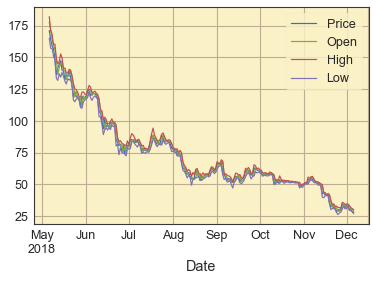

In [273]:
ltc.plot()

A bigger and clear one

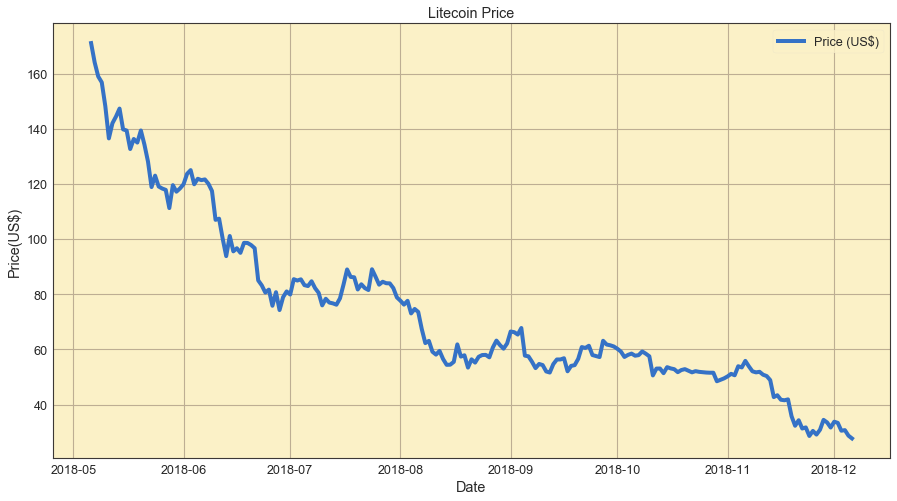

In [279]:
f, a = plt.subplots(figsize=(15, 8))
a.plot(ltc.index, ltc.Price, label="Price (US$)", lw=4)
a.set(xlabel="Date", ylabel="Price(US$)", title="Litecoin Price")
plt.legend(loc=0)

Attach the litecoin price to my data

In [280]:
ltc_data = df.merge(ltc, "left", left_on=df.index.date, right_on=ltc.index.date)

In [281]:
ltc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 11 columns):
key_0         61 non-null object
Difficulty    61 non-null float64
PPS Rate      61 non-null float64
Shares        61 non-null int64
Rewards       61 non-null float64
Price         61 non-null float64
Open          61 non-null float64
High          61 non-null float64
Low           61 non-null float64
Vol.          61 non-null object
Change %      61 non-null object
dtypes: float64(7), int64(1), object(3)
memory usage: 5.7+ KB


Drop some columns

In [282]:
ltc_data.drop(["Change %", "Vol."], axis=1, inplace=True)

Set the index and rename it

In [283]:
ltc_data.set_index(keys="key_0", inplace=True)
ltc_data.index.name = "Date"

In [284]:
ltc_data.head()

,Difficulty,PPS Rate,Shares,Rewards,Price,Open,High,Low
Date,,,,,,,,
2018-05-24,1.065980e+07,3.614370e-11,1094716928,0.039567,123.00,118.86,125.25,115.11
2018-05-28,1.130795e+07,3.407200e-11,820195840,0.027946,111.24,117.84,118.95,110.51
2018-05-31,1.092329e+07,3.527180e-11,2845824768,0.100377,118.36,117.18,120.99,116.49
2018-06-04,1.045068e+07,3.686690e-11,2795880448,0.103075,119.87,125.14,126.69,118.22
2018-06-07,1.012035e+07,3.807030e-11,4643028992,0.176762,121.63,121.37,123.48,119.65


Plot the correlation between different attribute.

Some insight:

. Difficulty and PPS Rate depends on each other, co.= .98

. itecoin price has strong relation with PPS Rate/Difficulty, co.=.85/.88

. My shares related to my earning (not supprise AT ALL!)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

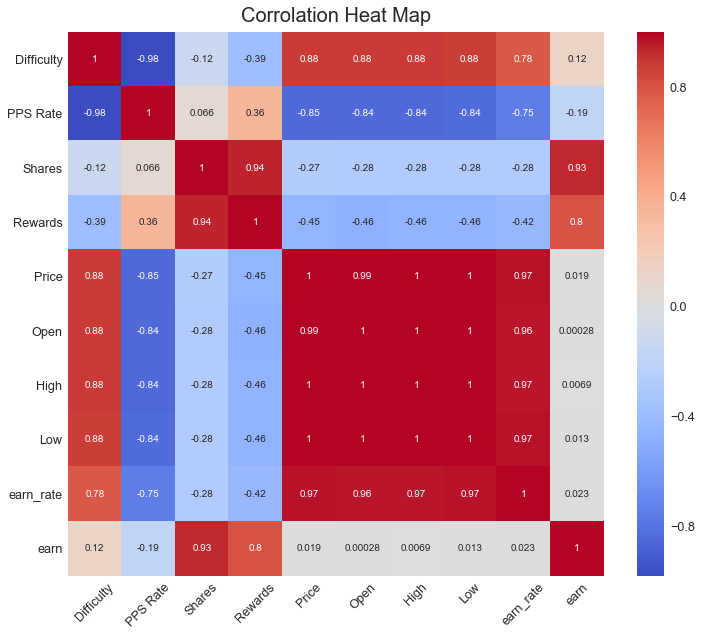

In [241]:
plt.figure(figsize=(12, 10))
sns.heatmap(ltc_data.corr(), cmap="coolwarm", annot=True)
plt.title("Corrolation Heat Map", pad=10, fontsize=20)
plt.xticks(rotation=45)

In [285]:
ltc_data.corr()

,Difficulty,PPS Rate,Shares,Rewards,Price,Open,High,Low
Difficulty,1.000000,-0.979538,-0.122202,-0.386073,0.881714,0.878506,0.880060,0.875358
PPS Rate,-0.979538,1.000000,0.066210,0.355565,-0.845836,-0.841289,-0.842540,-0.838984
Shares,-0.122202,0.066210,1.000000,0.943778,-0.269806,-0.282480,-0.278447,-0.277187
Rewards,-0.386073,0.355565,0.943778,1.000000,-0.452494,-0.463502,-0.458969,-0.457719
Price,0.881714,-0.845836,-0.269806,-0.452494,1.000000,0.992763,0.997989,0.996613
Open,0.878506,-0.841289,-0.282480,-0.463502,0.992763,1.000000,0.996247,0.997202
High,0.880060,-0.842540,-0.278447,-0.458969,0.997989,0.996247,1.000000,0.996602
Low,0.875358,-0.838984,-0.277187,-0.457719,0.996613,0.997202,0.996602,1.000000


In [286]:
ltc_data.dtypes

Difficulty    float64
PPS Rate      float64
Shares          int64
Rewards       float64
Price         float64
Open          float64
High          float64
Low           float64
dtype: object

PPS rate times Litecoin price at that time is the real earning rate in USD at THAT TIME!

In [288]:
ltc_data["earn_rate"] = ltc_data.Price * ltc_data["PPS Rate"]

Earning Rate times shares is the earning of that time.

In [289]:
ltc_data["earn"] = ltc_data.Shares * ltc_data.earn_rate

In [290]:
ltc_data.head()

,Difficulty,PPS Rate,Shares,Rewards,Price,Open,High,Low,earn_rate,earn
Date,,,,,,,,,,
2018-05-24,1.065980e+07,3.614370e-11,1094716928,0.039567,123.00,118.86,125.25,115.11,4.445675e-09,4.866756
2018-05-28,1.130795e+07,3.407200e-11,820195840,0.027946,111.24,117.84,118.95,110.51,3.790169e-09,3.108681
2018-05-31,1.092329e+07,3.527180e-11,2845824768,0.100377,118.36,117.18,120.99,116.49,4.174770e-09,11.880665
2018-06-04,1.045068e+07,3.686690e-11,2795880448,0.103075,119.87,125.14,126.69,118.22,4.419235e-09,12.355654
2018-06-07,1.012035e+07,3.807030e-11,4643028992,0.176762,121.63,121.37,123.48,119.65,4.630491e-09,21.499502


Plot it

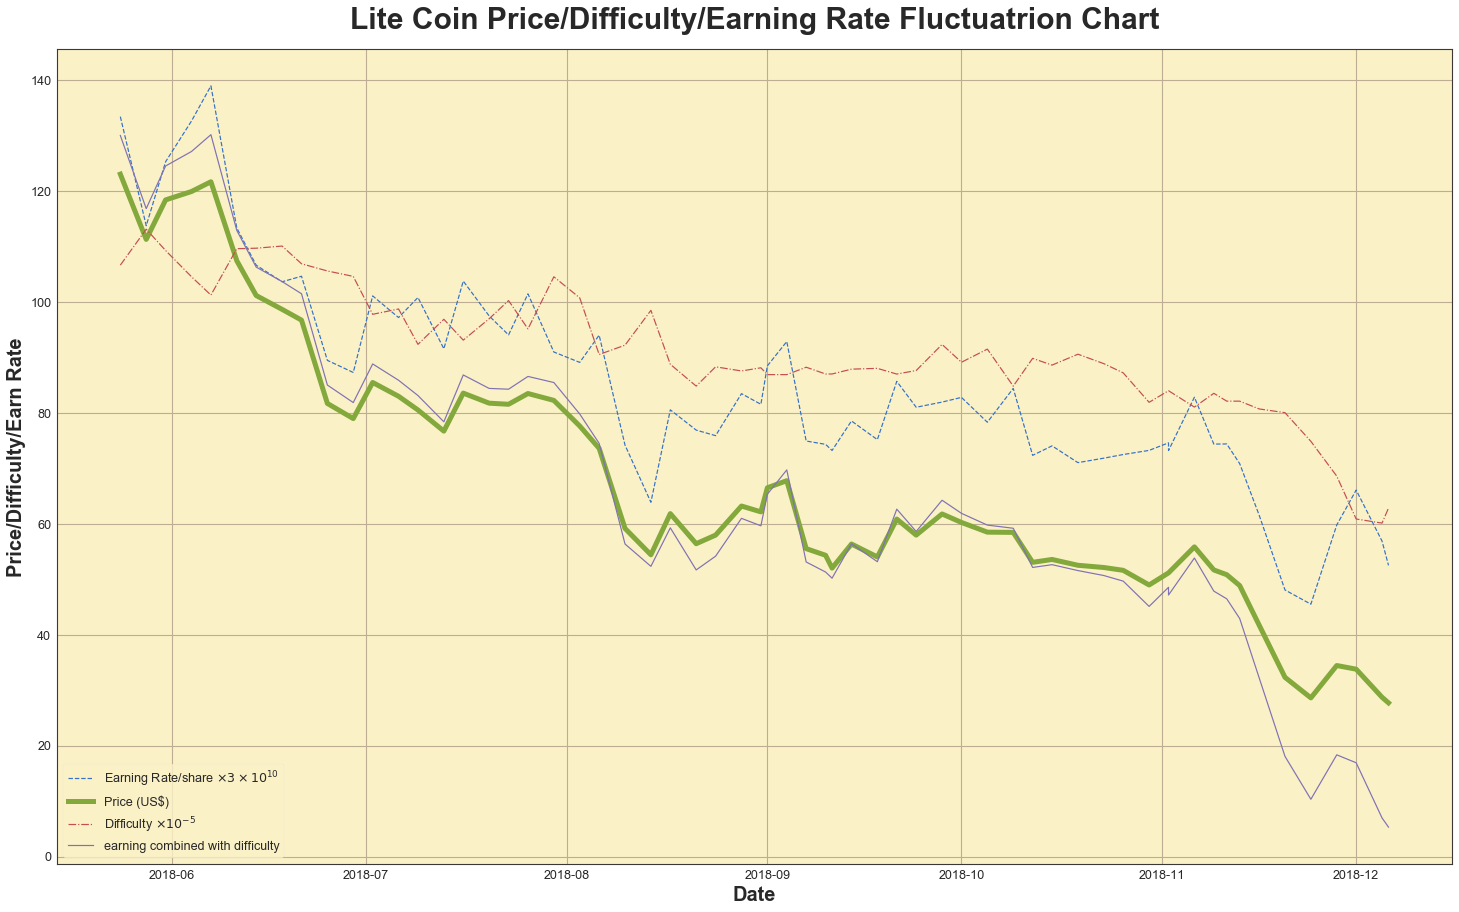

In [304]:
plt.figure(figsize=(25, 15))
plt.plot(
    ltc_data.index,
    ltc_data.earn_rate * 3e10,
    "--",
    label="Earning Rate/share $\\times3\\times10^{10}$ ",
)
plt.plot(ltc_data.index, ltc_data.Price, lw=5, label="Price (US$)")
plt.plot(
    ltc_data.index,
    ltc_data.Difficulty * 1e-5,
    "-.",
    label="Difficulty $\\times10^{-5}$",
)
plt.plot(
    ltc_data.index,
    (ltc_data.earn_rate * 3e10 + ltc_data.Difficulty * 1e-5 - 110),
    label="earning combined with difficulty",
)
plt.xlabel("Date", fontsize=20, fontweight="bold")
plt.ylabel("Price/Difficulty/Earn Rate", fontsize=20, fontweight="bold")
plt.title(
    "Lite Coin Price/Difficulty/Earning Rate Fluctuatrion Chart",
    fontsize=30,
    fontweight="bold",
    pad=20,
)
plt.legend(loc=3)

Some insight

. everything is dropping

. Earning dropped a little slower than the litecoin price, reflecting the coefficient of .85

. To my understanding the earning dropping is a little slower is because of the decrease of the difficulty.

. Given the utility price not changing much, the profitablity will inevitably dropp below 0 at some point

. I add the Difficulty curve and earning curve together, shifted a little, it almost matches the price curve.